In [27]:
import boto3
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Data Import

According to [data dictionary for iris dataset](https://s3.amazonaws.com/jakechenawspublic/tutorials/sample_data/iris-names.txt) the columns in this dataset are:

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

In [10]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
raw = pd.read_csv('s3://jakechenawspublic/tutorials/sample_data/iris/iris.csv', names=names)

In [11]:
raw.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

We should already have completed this step in either [AWS Athena](https://aws.amazon.com/athena) or [AWS Quicksight](https://quicksight.aws/) before even spinning up this notebook and importing the data in the last section. If not then we'll quickly reproduce the EDA findings here.

In [18]:
(set(raw.columns)-set(['iris_class']))

{'petal_length', 'petal_width', 'sepal_length', 'sepal_width'}

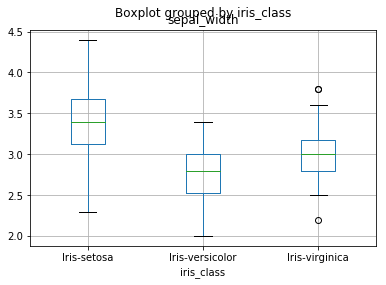

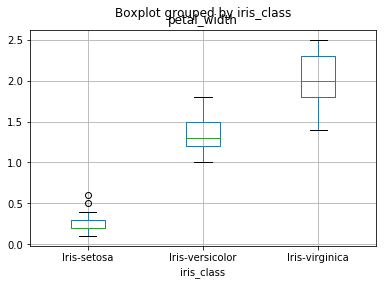

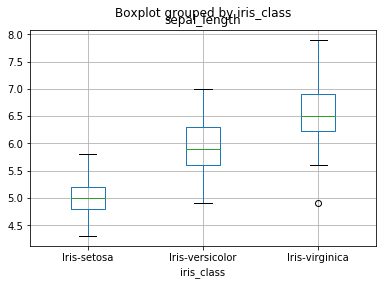

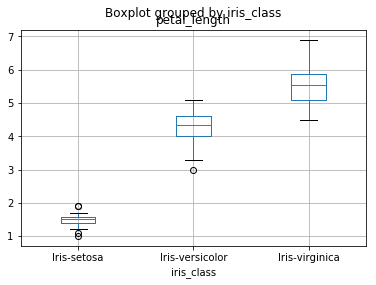

In [19]:
for cols in (set(raw.columns)-set(['iris_class'])):
    raw.boxplot(cols,'iris_class')

From the EDA performed in Athena and/or Quicksight, we should have gotten the following insights:

- Both petal length and petal width can differentiate Setosa from the other two
- Versicolor and Virginica show some overlap in all provided features

## Data Preparation

In simple data sets, data preparation step could just consist of easy tasks such as null removal and data subsetting. In complex cases though, such as those with large dimensions, this step could also consist of transformations that need pre-training, such as dimension reduction using Principle Components Analysis.

Based on the EDA performed before, we will choose a simple transformation: subsetting the data to only include petal_length, petal_width, and iris_class.

In [21]:
cols = ['petal_length','petal_width','iris_class']
data = raw[cols]

In [39]:
s3_resource = boto3.resource('s3')
s3_bucket = 'jakechenawspublic'
s3_key = 'tutorials/mlstack_demo/data/intermediary/post_transform.csv'
s3_resource.Object(s3_bucket, s3_key).put(Body=data.to_csv(None, index=False))

{u'ETag': '"8f85b32d093205515e10b400594b4fbf"',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '0',
   'date': 'Sat, 25 Mar 2017 23:43:07 GMT',
   'etag': '"8f85b32d093205515e10b400594b4fbf"',
   'server': 'AmazonS3',
   'x-amz-id-2': 'gZgvi/YKMvo9wuQ8gk1Y1hRtYL5h1zsnJFoUpkqquboj+rDIR+CtMkF4/uBuF2d86I6VP4NVr+M=',
   'x-amz-request-id': '16AF044D86F2AF10'},
  'HTTPStatusCode': 200,
  'HostId': 'gZgvi/YKMvo9wuQ8gk1Y1hRtYL5h1zsnJFoUpkqquboj+rDIR+CtMkF4/uBuF2d86I6VP4NVr+M=',
  'RequestId': '16AF044D86F2AF10',
  'RetryAttempts': 0}}